## Setup

In [1]:
import tensorflow as tf
import sys
import sklearn

In [2]:
assert sys.version_info >= (3,5)
assert sklearn.__version__ >="0.2"
assert tf.__version__ >="2.0"

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os

In [5]:
np.random.seed(42)
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

In [6]:
PROJECT_ROOT_DIR = "."
PROJECT_ID = "ann"
IMAGE_PATH =os.path.join(PROJECT_ROOT_DIR,'images', PROJECT_ID)
os.makedirs(IMAGE_PATH, exist_ok=True)

In [7]:
def save_fig(fig_id, file_extension='png',resolution=300, tight_layout=True):
    file_name =os.path.join(IMAGE_PATH,fig_id+"."+file_extension)
    
    if tight_layout:
        plt.tight_layout()
    print(f"Saving {fig_id}...")
    plt.savefig(file_name,
                dpi= resolution,
                format = file_extension
               )

## Perceptrons

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

In [8]:
iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target==0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])
y_pred


array([1])

In [9]:
per_clf.coef_, per_clf.intercept_

(array([[-1.4, -2.2]]), array([4.]))

Saving perceptron_iris_plot...


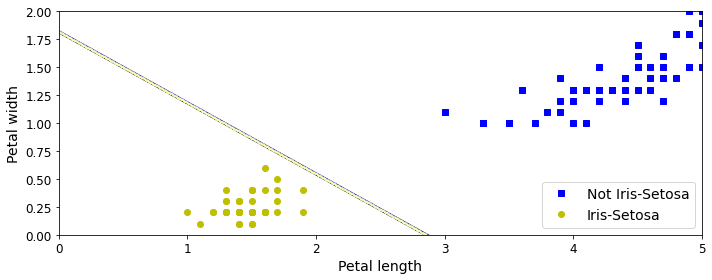

In [10]:
a = -per_clf.coef_[0,0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]

axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(np.linspace(axes[0], axes[1], 500).reshape(-1,1),
                     np.linspace(axes[2], axes[3], 200).reshape(-1,1)
                    )
X_new = np.c_[x0.ravel(),x1.ravel()]
y_new_pred = per_clf.predict(X_new)
zz = y_new_pred.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1],  "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1],  "yo", label="Iris-Setosa")

plt.plot((axes[0], axes[1]), (a*axes[0]+b, a*axes[1]+b), 'k-', linewidth=3)
custommap = ListedColormap(['#9898ff', '#fafab0'])

plt.contour(x0, x1, zz, cmap = custommap )
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")

plt.show()


### activation function

In [11]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z+eps) -f(z-eps))/(2*eps)
    

Saving activation_functions_plot...


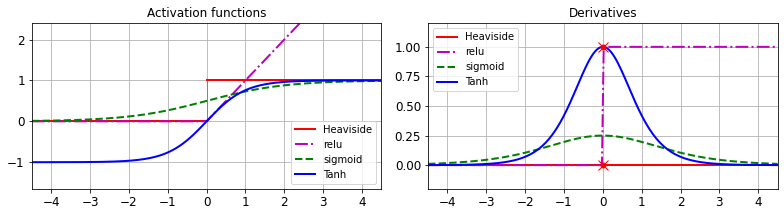

In [12]:
max_z=4.5
z = np.linspace(-max_z, max_z, 200)
plt.figure(figsize=(11, 3.1))
plt.subplot(121)
plt.plot((-max_z,0),(0,0),'r-', linewidth=2, label ="Heaviside")
plt.plot((0,0),(0,1),'r-', linewidth=0.5)
plt.plot((0,max_z),(1,1),'r-', linewidth=2)
plt.plot(z, relu(z), 'm-.', linewidth=2, label= "relu")
plt.plot(z, sigmoid(z), 'g--', linewidth=2, label= "sigmoid")
plt.plot(z, np.tanh(z), 'b-', linewidth =2, label = 'Tanh')
plt.grid()
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.title("Activation functions")
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(z, derivative(np.sign,z),'r-', linewidth=2, label ="Heaviside")

plt.plot(z, derivative(relu,z), 'm-.', linewidth=2, label= "relu")
plt.plot(z, derivative(sigmoid, z), 'g--', linewidth=2, label= "sigmoid")
plt.plot(z, derivative(np.tanh, z), 'b-', linewidth =2, label = 'Tanh')
plt.grid()
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(0, 1, "ro", markersize=5)
plt.plot(0, 1, "rx", markersize=10)

plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.legend(loc="upper left")

save_fig("activation_functions_plot")
plt.show()

In [13]:
def heavside(z):
    return (z >= 0).astype(z.dtype)

def xor_mlp(x1, x2, activation=heavside):
    return activation(-0.5 - activation(-1.5 + x1 + x2) +activation(-0.5 +x1 +x2))


In [14]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1,x2 = np.meshgrid(x1s, x2s)

In [15]:

x1=np.array([0])
x2=np.array([1])
xor_mlp(x1,x2,activation=heavside)

array([1.])

In [16]:
x1

array([0])

### Regression MLPs

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [18]:
housing = fetch_california_housing()
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_valid_pred = pipeline.predict(X_valid)
mean_squared_error(y_valid, y_valid_pred, squared=False)

0.505332665796861

In [19]:
cal.keys()

NameError: name 'cal' is not defined

## Implementing MLP with keras
### Building an image classifier using the sequential API

#### Using Keras to load the dataset

In [ ]:
import tensorflow as tf

In [ ]:
fashion_MNIST = tf.keras.datasets.fashion_mnist.load_data() 

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) =  fashion_MNIST

In [ ]:
X_train, X_valid= X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [ ]:
X_train.shape, X_train.dtype

In [ ]:
# Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.



In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_names[y_train[0]]

In [ ]:
n_rows = 4
n_cols = 10

plt.figure(figsize = (n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):        
        plt.subplot(n_rows, n_cols, row*n_cols+col+1)
        plt.imshow(X_train[row*n_cols+col], cmap ='binary')
        plt.title(class_names[y_train[row*n_cols+col]])
        plt.axis("off")
        
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.layers

In [ ]:
hidden1= model.layers[1]
hidden1.name

In [ ]:
weights, biases = hidden1.get_weights()
weights.shape, biases.shape

In [ ]:
# try not using Flatten
model = tf.keras.Sequential(
[tf.keras.Input(shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
]    
)
model.summary()

#### Compiling the model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer ='sgd',
             metrics=['accuracy'])

This is equal to the following:

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics= tf.keras.metrics.sparse_categorical_accuracy,
             optimizer = tf.keras.optimizers.SGD())

In [ ]:
# try some incorrect parameter,
model.compile(loss='categorical_crossentropy',
             metrics ='accuracy',
             optimizer='sgd')

In [ ]:
# how to convert the class id to one hot vector
# it is necessary to give numerical_class when the number of class is greater than the maximum class id in the sample
tf.keras.utils.to_categorical([0,5,1,0],num_classes =10)

In [ ]:
# how to convert one-hot vector to class-id
np.argmax([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],axis=1)

#### training and evaluating the model

In [ ]:
history=model.fit(X_train,y_train, epochs=30, validation_data=(X_valid,y_valid))

In [ ]:
history.params

In [ ]:
print(history.epoch)

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
pd.DataFrame(history.history).plot(
figsize=(8,5),xlim=[0,29], ylim=[0,1],grid=True,
    xlabel='Epoch',
    style=["r--", "r--.","b-", "b-*"]
)
save_fig("keras_learning_curves_plot") 
plt.show()

In [ ]:
history.history.keys()

In [ ]:
# The validation error is computer at the end of each tpoch, while the training error is computed using a running
# mean during each epoch
for key, style in zip(history.history,["r--", "r--.","b-", "b-*"]):
    epoch = np.array(history.epoch)  + (0 if key.startswith("val_") else -0.5)
    plt.plot(epoch, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 28, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

#### using the model to make prediction

In [ ]:
X_new =X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
y_proba.argmax(axis=1),y_proba.argmax(axis=-1)

In [ ]:
y_test[:3]

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for idx,image in enumerate(X_new):
    plt.subplot(1, 3,idx+1 )
    plt.imshow(image, cmap='binary',interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_test[idx]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)    
plt.show()
    

### Building a regression MLP 

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [ ]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model_reg = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
]
)
norm_layer.adapt(X_train)
optimizer= tf.keras.optimizers.Adam(learning_rate =1e-3)
model_reg.compile(optimizer= optimizer,
                 loss ='mse',
                 metrics = ['RootMeanSquaredError'])
history = model_reg.fit(X_train, y_train, epochs=20,
                       validation_data =(X_valid, y_valid))
mse_test,rmse_test = model_reg.evaluate(X_test, y_test)
X_new = X_test[:3]
y_proba = model_reg.predict(X_new)


In [ ]:
rmse_test

In [ ]:
y_proba, y_test[:3]

### Building Complex Models Using the functional API
Some Neural network may need complex topologies. some may have multiple inputs and/or multiple outputs. For example, a Wide&Deep neural network connects part or all of the inputs to the output(paper:  https://research.google/pubs/pub45413/)

* tf.keras.layers.**Concatenate()** is for Sequential API and **concatenate()** is for functional API

In [ ]:
# – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
normalization = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30, activation='relu')
hidden2 = tf.keras.layers.Dense(30, activation='relu')
concate = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape= X_train.shape[1:]) #input_ is used to avoid overshadowing python's build in input
normalized = normalization(input_)
hidden1 = hidden1(normalized)
hidden2 = hidden2(hidden1)
concat = concate([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(optimizer=optimizer, loss ='mse', metrics=['RootMeanSquaredError'])
normalization.adapt(X_train)
model.fit(X_train,y_train, epochs=20, validation_data =(X_valid, y_valid))


In [ ]:
mse_test,rmse_test = model.evaluate(X_test, y_test)
mse_test

In [ ]:
y_pred=model.predict(X_new)
y_pred,y_test[:3]

In [ ]:
# examples of setting different subsets of input features through deep-wide neural network. eg, we will send 5
# features to wide(0:4) and 6 features through deep(feature 2:7). 3 features will go through both( 2,3,4)
X_train_wide, X_valid_wide, X_test_wide = X_train[:, :5], X_valid[:, :5], X_test[:, :5]
X_train_deep, X_valid_deep, X_test_deep = X_train[:, 2:], X_valid[:, 2:], X_test[:, 2:]

tf.keras.backend.clear_session()
tf.random.set_seed(42)


hidden1 = tf.keras.layers.Dense(30, activation='relu')
hidden2 = tf.keras.layers.Dense(30, activation='relu')
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
output_layer = tf.keras.layers.Dense(1)

input_wide = tf.keras.Input(shape=X_train_wide.shape[1:])
input_deep = tf.keras.Input(shape=[6])
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = hidden1(norm_deep)
hidden2 = hidden2(hidden1)
concate = tf.keras.layers.concatenate([norm_wide, hidden2])
output = output_layer(concate)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [ ]:
model.summary()

In [ ]:
optimizer= tf.keras.optimizers.Adam(learning_rate =1e-3)
model.compile(optimizer=optimizer,
              loss ='mse',
              metrics=["RootMeanSquaredError"])
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep),y_train, epochs=20,
         validation_data=((X_valid_wide, X_valid_deep),y_valid))


In [ ]:
X_wide_new, X_deep_new = X_test_wide[:3], X_test_deep[:3]
mse_test,rmse_test = model.evaluate((X_test_wide, X_test_deep),(y_test))
y_pred =model.predict((X_wide_new, X_deep_new))


In [ ]:
y_pred, y_test[:3]

In [ ]:
# Add auxiliary output
tf.keras.backend.clear_session()
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concate = tf.keras.layers.concatenate([norm_wide, hidden2])
output_main = tf.keras.layers.Dense(1)(concate)
output_aux = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],outputs=[output_main, output_aux])
model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", 'mse'), loss_weights=(0.9,0.1), 
              optimizer =optimizer,
             metrics=["RootMeanSquaredError"])
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep),(y_train, y_train), 
         epochs =20,
         validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

In [ ]:
eval_results= model.evaluate((X_test_wide, X_test_deep),(y_test,y_test))
(y_pred_main, y_pred_aux)=model.predict((X_wide_new, X_deep_new))

In [ ]:
weighted_sum_loss,mse_main, mse_aux, rmse_main, rmse_aux=eval_results

In [ ]:
y_pred_tuple = model.predict((X_wide_new, X_deep_new))
dict(zip(model.output_names,y_pred_tuple))


### Using the Subclasing API to build dynamic models

In [ ]:
# using multiple output as mentioned above as an example
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) #needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        """
        inputs contain both deep and wide net needed data
        """
        input_wide, input_deep =inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [ ]:
model = WideAndDeepModel(units=30, activation='relu', name='my_wd_model')

In [ ]:
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=('mse', 'mse'), loss_weights=(0.9, 0.1),
             optimizer = optimizer,
             metrics=['RootMeanSquaredError'])
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train),
         epochs =20,
         validation_data = ((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = model.evaluate((X_test_wide, X_test_deep),(y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_wide_new, X_deep_new))



In [ ]:
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse 

In [ ]:
y_pred_main, y_pred_aux

### Saving and restoring the model

In [7]:
import shutil
from pathlib import Path

In [ ]:
shutil.rmtree('my_keras_model', ignore_errors=True)

In [ ]:
model.save("my_keras_model", save_format="tf")

In [ ]:
# show the content of my_keras_model
for path in sorted(Path('my_keras_model').glob("**/*")):
    print(path)

In [ ]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_aux_main = model.predict((X_wide_new, X_deep_new))
y_pred_main, y_aux_main

In [ ]:
model.save_weights("my_weights")

In [ ]:
model.load_weights("my_weights")

In [ ]:
for path in sorted(Path().glob("my_weights.*")):
    print(path)

### Callbacks
Saving checkpoints regularly in case the computer crashes during the big project

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints', save_weights_only= True)
history = model.fit((X_train_wide, X_train_deep),(y_train, y_train),epochs=10,
                   validation_data =((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
                   callbacks=[checkpoint_cb])

In [ ]:
# Early stopping will interrupt training when it measures no progress on the validation set for a number of epochs
# (defined by the patience argument)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                    restore_best_weights=True)
history = model.fit((X_train_wide, X_train_deep),(y_train, y_train),epochs=100,
                   validation_data =((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
                   callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio =logs['val_loss']/logs['loss']
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit((X_train_wide, X_train_deep),(y_train, y_train),epochs=100,
                   validation_data =((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
                       callbacks=[val_train_ratio_cb,early_stopping_cb], verbose=0)

### TensorBoard for Visualization

In [23]:
shutil.rmtree('my_logs',ignore_errors=True)

In [118]:
from time import strftime

In [119]:
def get_run_logdir(root_logdir='my_logs'):
    return Path(root_logdir)/strftime('run_%Y_%m_%d_%H_%M_%S')

In [120]:
run_logdir = get_run_logdir() #e.g.'my_logs/run_2023_01_10_14_35_11'

In [121]:
run_logdir


WindowsPath('my_logs/run_2023_01_12_10_38_03')

In [29]:
# build the simple regression model for test
tf.keras.backend.clear_session()
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
norm_layer.adapt(X_train)
model.compile(loss='mse', optimizer =optimizer, metrics=['RootMeanSquaredError'])

In [30]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                   validation_data =( X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 3s 2ms/step - loss: 0.9632 - root_mean_squared_error: 0.9814 - val_loss: 3.4757 - val_root_mean_squared_error: 1.8643
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4555 - root_mean_squared_error: 0.6749 - val_loss: 1.7186 - val_root_mean_squared_error: 1.3110
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3932 - root_mean_squared_error: 0.6271 - val_loss: 0.7386 - val_root_mean_squared_error: 0.8594
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3695 - root_mean_squared_error: 0.6079 - val_loss: 0.4141 - val_root_mean_squared_error: 0.6435
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3600 - root_mean_squared_error: 0.6000 - val_loss: 0.3410 - val_root_mean_squared_error: 0.5840
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3473 - root_mean_squared_error: 0.5893 - val_loss: 0.5858 - val_

In [37]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print(" "* (len(path.parts)-1) +path.parts[-1])

my_logs
 run_2023_01_10_14_35_11
  events.out.tfevents.1673380175.NINGSUN.profile-empty
  plugins
   profile
    2023_01_10_19_49_35
     NINGSUN.xplane.pb
  train
   events.out.tfevents.1673380173.NINGSUN.31192.0.v2
  validation
   events.out.tfevents.1673380175.NINGSUN.31192.1.v2


In [64]:
%reload_ext tensorboard

In [67]:
%tensorboard --logdir=./my_logs --host localhost

In [66]:
if "google.colab" in sys.modules:
    from google.colab import output
    output.serve_kernel_port_as_windows(6006)
else:
    from IPython.display import display, HTML
    display(HTML("<a href='http://localhost:6006/'>http://localhost:6006/</a>"))

In [50]:
# example of visulizing scalar, histogram, images and audios and we could check the results in TensorBoard
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 +1):
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        
        data = (np.random.randn(100)+2) * step /100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images= np.random.rand(2,32,32,3) *step /1000 #get brighter
        tf.summary.image("my_images", images, step= step)
        
        texts = ['The step is ' +str(step), " Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000)/48000 *2 *np.pi*step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1,1])
        tf.summary.audio("my_audio", audio, step= step, sample_rate=48000)

In [52]:
# share the TensorBoard log with the world by upload to  https://tensorboard.dev/
if 'google.colab' in sys.modules:
    !tensorboard dev upload --logdir ./my_logs --oneshot \
    --name "Quick Test" --description "This is a test"
else:
    from tensorboard.main import run_main
    
    argv = "tensorboard dev upload --logdir ./my_logs --one_shot".split()
    argv += ["--name", "Quick Test", "--description", "This is a test"]
    
    try:
        original_sys_argv_and_sys_exit = sys.argv, sys.exit
        print(f"--{original_sys_argv_and_sys_exit}")
        sys.argv, sys.exit = argv, lambda status: None
        run_main()
        
    finally:
        sys.argv, sys.exit =original_sys_argv_and_sys_exit
        



***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./my_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.



--(['C:\\Users\\mrnin\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\mrnin\\AppData\\Roaming\\jupyter\\runtime\\kernel-e5d12e0b-d253-4d20-93de-559a1d3d620e.json'], <built-in function exit>)
Continue? (yes/NO) yes


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=THlZUpUSBUBOXknDuGVaykAYvBNWtF&prompt=consent&access_type=offline
Enter the authorization code: 4/1AWgavdehehPHGF2FoMHnhk8MnWKvo-4I3QuicVm8Bv3V880pjLKbTe2uh2U



New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/XqeYcBMbS9KvSLsoNObGUg/

[2023-01-10T16:08:27] Started scanning logdir.
[2023-01-10T16:08:33] Total uploaded: 3120 scalars, 3000 tensors (2.4 MB), 1 binary objects (46.1 kB)
[2023-01-10T16:08:33] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/XqeYcBMbS9KvSLsoNObGUg/


In [53]:
# list the published experiments
!tensorboard dev list

https://tensorboard.dev/experiment/XqeYcBMbS9KvSLsoNObGUg/

Total: 1 experiment(s)



	Name                 Quick Test
	Description          This is a test
	Id                   XqeYcBMbS9KvSLsoNObGUg
	Created              2023-01-10 16:08:25 (3 minutes ago)
	Updated              2023-01-10 16:08:31 (3 minutes ago)
	Runs                 5
	Tags                 8
	Scalars              3120
	Tensor bytes         2717436
	Binary object bytes  47364


In [54]:
# delete an experiment
!tensorboard dev delete --experiment_id XqeYcBMbS9KvSLsoNObGUg

Deleted experiment XqeYcBMbS9KvSLsoNObGUg.


In [55]:
# List all tensorboard instances
from tensorboard import notebook

In [57]:
notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 1:03:26 ago; pid 32640)


In [59]:
!taskkill /F /PID 32640

SUCCESS: The process with PID 32640 has been terminated.


## Fine-Tuning Neural Network Hyperparameters

In [8]:
import keras_tuner as kt

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [10]:
(X_train_full,y_train_full),(X_test, y_test) = fashion_mnist
X_train,X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train,y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [11]:
print(X_train.shape, X_valid.shape)
y_train.shape, y_valid.shape

(55000, 28, 28) (5000, 28, 28)


((55000,), (5000,))

In [12]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default =2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value =1e-4,
                            max_value=1e-2, sampling='log')
    optimizer = hp.Choice('optimizer', values=['sgd','adam'])
    if optimizer == 'sgd':
        optimizer  = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])
    return model

In [13]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory='my_fashion_mnist', project_name='my_rnd_search', seed=42
)
random_search_tuner.search(X_train, y_train, epochs=10, 
                          validation_data =(X_valid, y_valid))

Trial 5 Complete [00h 00m 24s]
val_accuracy: 0.8723999857902527

Best val_accuracy So Far: 0.8723999857902527
Total elapsed time: 00h 01m 43s
INFO:tensorflow:Oracle triggered exit


In [23]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model= top3_models[0]

In [24]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 5,
 'n_neurons': 70,
 'learning_rate': 0.00041268008323824807,
 'optimizer': 'adam'}

In [25]:
best_trial= random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 5
n_neurons: 70
learning_rate: 0.00041268008323824807
optimizer: adam
Score: 0.8690000176429749


In [27]:
best_trial.metrics.get_best_value('val_accuracy')

0.8690000176429749

In [28]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test,y_test)
test_loss, test_accuracy

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3211 - accuracy: 0.8837
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3086 - accuracy: 0.8879
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3023 - accuracy: 0.8889
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2930 - accuracy: 0.8920
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2867 - accuracy: 0.8948
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2797 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2746 - accuracy: 0.8984
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2683 - accuracy: 0.9004
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2614 - accuracy: 0.9031
Epoch 10/10
313/313 [==============================] - 0s 870us/step - loss: 0.384

(0.38395994901657104, 0.8737000226974487)

In [33]:
# building class in the case of fine-tuning data preprocessing hyperparameters, or model.fit() arguments
# eg we want to normalize(standardize) the training set before fitting the model
class MyClassificationModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)
    
    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean('normalize'):
            norm_layer=tf.keras.layers.Normalization()
            X = norm_layer(X)
            
        return model.fit(X,y, **kwargs)

In [34]:
# The total num of training epochs across all models for each hyperban iteration is about
# max_epochs*(log(max_epochs)/log(factor))**2 --44, 
# need to add () at the end of customerized function 
hyperband_tuner = kt.Hyperband(MyClassificationModel(), objective='val_accuracy',
                              hyperband_iterations=2, max_epochs=10,factor=3,
                              overwrite=True, directory='my_fashion_mnist', project_name='hyperband')

In [16]:
from pathlib import Path

In [35]:
root_logdir = Path(hyperband_tuner.project_dir)/'tensorboard'
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                      validation_data=(X_valid, y_valid),
                      callbacks=[early_stopping_cb,tensorboard_cb])

Trial 60 Complete [00h 00m 22s]
val_accuracy: 0.8519999980926514

Best val_accuracy So Far: 0.8817999958992004
Total elapsed time: 00h 14m 11s
INFO:tensorflow:Oracle triggered exit


In [ ]:
%reload_ext tensorboard

In [39]:
%tensorboard --logdir {root_logdir} --host localhost

In [36]:
bayesian_opt_tuner = kt.BayesianOptimization(
MyClassificationModel(), objective='val_accuracy', seed=42,
max_trials=10, alpha=1e-4, beta=2.6,
overwrite=True, directory='my_fashion_mnist', project_name='bayesian_opt')

In [37]:
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                         validation_data =(X_valid, y_valid),
                         callbacks=[early_stopping_cb,tensorboard_cb])


Trial 10 Complete [00h 00m 05s]
val_accuracy: 0.8077999949455261

Best val_accuracy So Far: 0.8489999771118164
Total elapsed time: 00h 02m 29s
INFO:tensorflow:Oracle triggered exit


## Train MNIST through MLP 

In [40]:
mnist = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [43]:
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [44]:
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape


((55000, 28, 28), (5000, 28, 28), (55000,), (5000,))

In [61]:
# we scale the  pixel intensities down to the 0-1 range and convert them to floats,
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

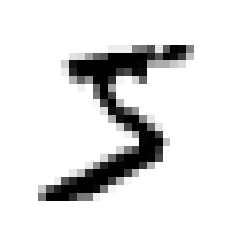

In [69]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [72]:
# we create a callback to run at the end of each iteration to grow the learning rate and record the loss and learning rate 
K = tf.keras.backend 
class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        
        self.losses = []
        self.rates = []
        self.factor = factor
        
    def on_batch_end(self,batch,logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate*self.factor)

In [74]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    
])
factor=1.005
expon_rate_cb = ExponentialLearningRate(factor= factor)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = optimizer,
             metrics='accuracy')
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4)
history = model.fit(X_train, y_train, epochs=1,
                   validation_data = (X_valid, y_valid),
                   callbacks =[ expon_rate_cb])

1719/1719 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.6118 - val_loss: nan - val_accuracy: 0.0978


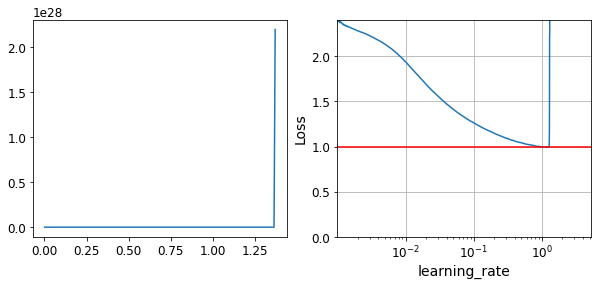

In [94]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(expon_rate_cb.rates, expon_rate_cb.losses)

plt.subplot(122)
plt.plot(expon_rate_cb.rates, expon_rate_cb.losses)
plt.gca().set_xscale("log")
plt.hlines(min(expon_rate_cb.losses), min(expon_rate_cb.rates),max(expon_rate_cb.rates),colors='r')
plt.axis([min(expon_rate_cb.rates), max(expon_rate_cb.rates),0, expon_rate_cb.losses[0]])
plt.grid()
plt.xlabel('learning_rate')
plt.ylabel('Loss')
plt.show()

In [99]:
expon_rate_cb.rates[np.argmin(expon_rate_cb.losses)]


0.31918472

In [122]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28] ),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
optimizer = tf.keras.optimizers.SGD(learning_rate =3e-1)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=['accuracy'])

In [123]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [124]:
run_logdir = get_run_logdir()
run_logdir

WindowsPath('my_logs/run_2023_01_12_10_39_01')

In [125]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb =tf.keras.callbacks.ModelCheckpoint("my_mnist_model",save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
model.fit(X_train, y_train, epochs=100,
         validation_data =(X_valid, y_valid),
         callbacks=[early_stopping_cb,checkpoint_cb, tensorboard_cb])

Epoch 1/100
1710/1719 [============================>.] - ETA: 0s - loss: 0.2378 - accuracy: 0.9253

INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 7s 4ms/step - loss: 0.2372 - accuracy: 0.9255 - val_loss: 0.0996 - val_accuracy: 0.9696
Epoch 2/100
1715/1719 [============================>.] - ETA: 0s - loss: 0.0966 - accuracy: 0.9697

INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 6s 4ms/step - loss: 0.0967 - accuracy: 0.9696 - val_loss: 0.0768 - val_accuracy: 0.9778
Epoch 3/100
1718/1719 [============================>.] - ETA: 0s - loss: 0.0671 - accuracy: 0.9792

INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 7s 4ms/step - loss: 0.0670 - accuracy: 0.9792 - val_loss: 0.0751 - val_accuracy: 0.9794
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.0802 - val_accuracy: 0.9784
Epoch 5/100
1713/1719 [============================>.] - ETA: 0s - loss: 0.0369 - accuracy: 0.9883

INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 6s 4ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0669 - val_accuracy: 0.9834
Epoch 6/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0942 - val_accuracy: 0.9760
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0871 - val_accuracy: 0.9830
Epoch 8/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0191 - accuracy: 0.9937 - val_loss: 0.0735 - val_accuracy: 0.9842
Epoch 9/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0159 - accuracy: 0.9946 - val_loss: 0.0778 - val_accuracy: 0.9826
Epoch 10/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0920 - val_accuracy: 0.9820
Epoch 11/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.0924 - val_accuracy: 0.

In [126]:
model= tf.keras.models.load_model("my_mnist_model")
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0647 - accuracy: 0.9826


[0.06472280621528625, 0.9825999736785889]

In [129]:
%tensorboard --logdir =./my_logs --host localhost

Reusing TensorBoard on port 6006 (pid 31628), started 0:01:23 ago. (Use '!kill 31628' to kill it.)

In [133]:
from tensorboard import notebook
notebook.list()

Known TensorBoard instances:
  - port 6006: logdir my_fashion_mnisthyperbandtensorboard (started 19:58:57 ago; pid 14184)
  - port 6006: logdir my_fashion_mnisthyperbandtensorboard (started 1 day, 0:28:55 ago; pid 18788)
  - port 6006: logdir =./my_logs (started 0:03:30 ago; pid 31628)
  - port 6006: logdir ./my_logs (started 1 day, 19:35:17 ago; pid 32640)
  - port 6006: logdir =./my_logs (started 0:16:04 ago; pid 34304)
  - port 6006: logdir ./my_logs (started 1 day, 18:19:34 ago; pid 9292)
